Malaria Detection

Denne journal tager udgangspunkt i NIHs officielle malaria dataset: https://ceb.nlm.nih.gov/repositories/malaria-datasets/. Datasettet indeholder 27,558 billeder af hhv. smittede og raske celler.
Dette dataset er blevet uploaded til Kaggle, hvorfra vi vil benytte dette til at træne en algorithme der kan skelne mellem raske celler og celler der er blevet smittet med malaria. 


In [1]:
# Konstante variabler:
Base_Path = "malaria"
Original_Input_dataset = "malaria/cell_images"

Training_Split = 0.8 # i %. Vi tager 80% af dataen til træning og 20% til testing.
Validation_Split = 0.1 # af de 80% til træning, tager vi 10% til validation.

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash
!pwd

mkdir: /root/.torch/models: Permission denied
mkdir: /root/.fastai/data: Permission denied
ln: /content: Permission denied
ln: /content: Permission denied
Updating fastai...
Done.
/Users/oscarp/Documents/Malaria_J3


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import *

import numpy as np
np.random.seed(7)

In [5]:
# Transformation values taken from https://bit.ly/2Wj13Nt
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=20., max_zoom=0.05)
len(tfms)

2

In [6]:
# Tjekker korrekte folder path
!ls '/Users/oscarp/Documents/Malaria_J3/cell_images/'

Parasitized Uninfected  models


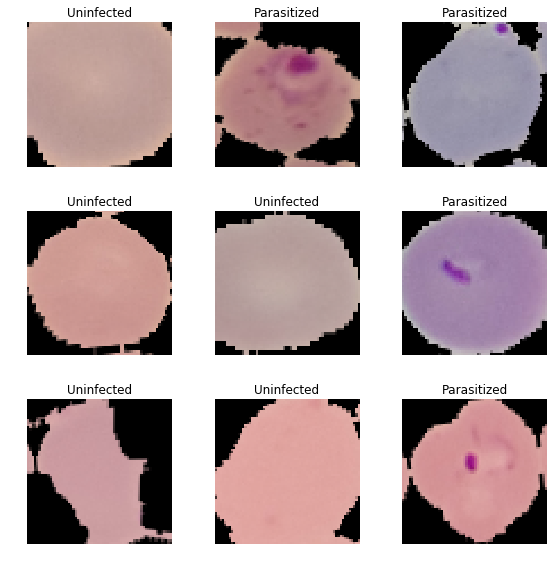

In [7]:
path = '/Users/oscarp/Documents/Malaria_J3/cell_images/'
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.1,
                                  size=64, bs=16).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(8,8))

In [8]:
# Labels of the data
print(data.classes)

['Parasitized', 'Uninfected']


(Image (3, 64, 64), Category Parasitized)


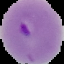

In [9]:
print(data.train_ds[10])
data.valid_ds[10][0]

(Image (3, 64, 64), Category Uninfected)


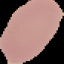

In [10]:
print(data.valid_ds[0])
data.valid_ds[0][0]

In [11]:
data.label_list


LabelLists;

Train: LabelList (24803 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: /Users/oscarp/Documents/Malaria_J3/cell_images;

Valid: LabelList (2755 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Uninfected,Uninfected,Parasitized,Parasitized,Uninfected
Path: /Users/oscarp/Documents/Malaria_J3/cell_images;

Test: None

In [12]:
# Training in mixed precision policy + 1cycle policy: https://docs.fast.ai/basic_train.html#fit_one_cycle
learn = cnn_learner(data, models.resnet34, metrics=[accuracy]).to_fp16()
learn.fit_one_cycle(5);
learn.recorder.plot_losses()


epoch,train_loss,valid_loss,accuracy,time


RuntimeError: _thnn_conv2d_forward not supported on CPUType for Half